<a href="https://colab.research.google.com/github/mrashutoshnigam/ai-ml-course/blob/main/Machine-Learning/Oreilly/Ch4_TrainingModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models

In [3]:
!pip install pandas numpy scikit-learn matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X= 2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

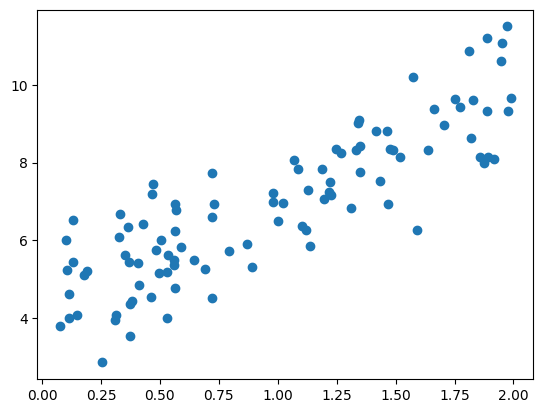

In [6]:
plt.scatter(X,y)
plt.show()

In [7]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.21836334],
       [2.76869682]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21836334],
       [9.75575699]])

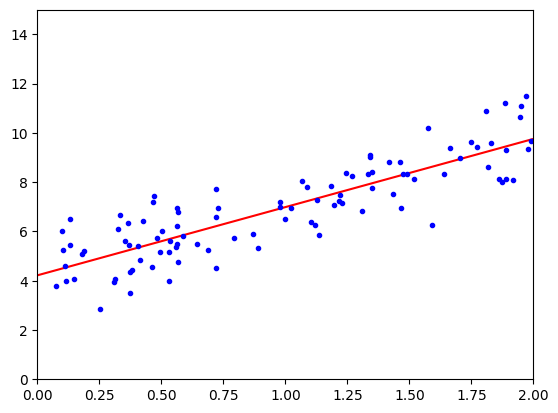

In [10]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()